In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv('/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
data=data.drop(['society'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   total_sqft    13320 non-null  object 
 5   bath          13247 non-null  float64
 6   balcony       12711 non-null  float64
 7   price         13320 non-null  float64
dtypes: float64(3), object(5)
memory usage: 832.6+ KB


In [6]:
data.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [7]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12710 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  object 
 1   availability  12710 non-null  object 
 2   location      12710 non-null  object 
 3   size          12710 non-null  object 
 4   total_sqft    12710 non-null  object 
 5   bath          12710 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         12710 non-null  float64
dtypes: float64(3), object(5)
memory usage: 893.7+ KB


In [8]:
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12146 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12146 non-null  object 
 1   availability  12146 non-null  object 
 2   location      12146 non-null  object 
 3   size          12146 non-null  object 
 4   total_sqft    12146 non-null  object 
 5   bath          12146 non-null  float64
 6   balcony       12146 non-null  float64
 7   price         12146 non-null  float64
dtypes: float64(3), object(5)
memory usage: 854.0+ KB


In [9]:
from sklearn.preprocessing import LabelEncoder
for i in data.columns:
    if data[i].dtype=='object':
        data[i]=LabelEncoder().fit_transform(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12146 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12146 non-null  int64  
 1   availability  12146 non-null  int64  
 2   location      12146 non-null  int64  
 3   size          12146 non-null  int64  
 4   total_sqft    12146 non-null  int64  
 5   bath          12146 non-null  float64
 6   balcony       12146 non-null  float64
 7   price         12146 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 854.0 KB


In [10]:
c=data.corr()
print(c['price'])

area_type      -0.056610
availability    0.031656
location        0.011827
size            0.385559
total_sqft      0.220550
bath            0.456023
balcony         0.118570
price           1.000000
Name: price, dtype: float64


<Axes: xlabel='price', ylabel='Count'>

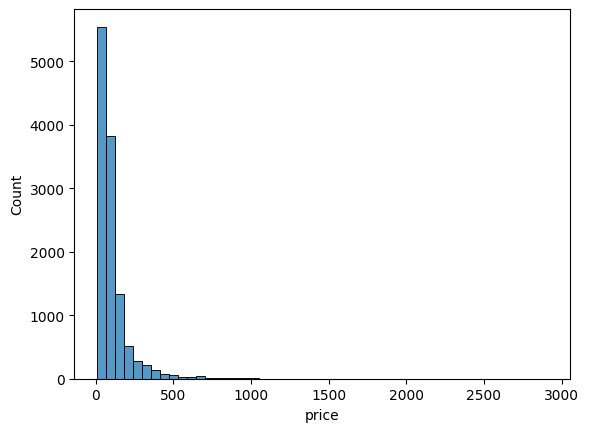

In [11]:
import seaborn as sns
sns.histplot(data,x='price',bins=50)

<Axes: >

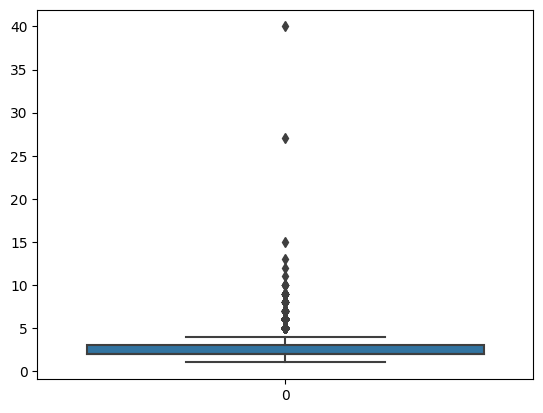

In [12]:
sns.boxplot(data['bath'])

<Axes: >

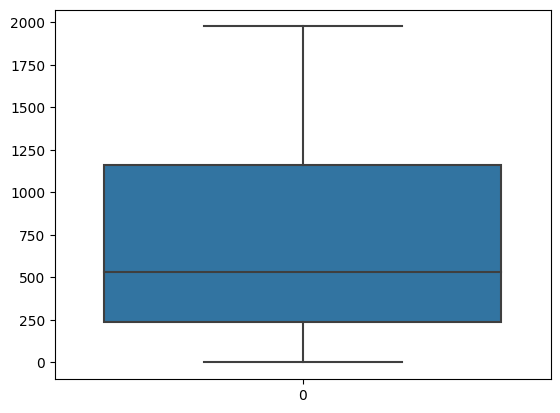

In [13]:
sns.boxplot(data['total_sqft'])

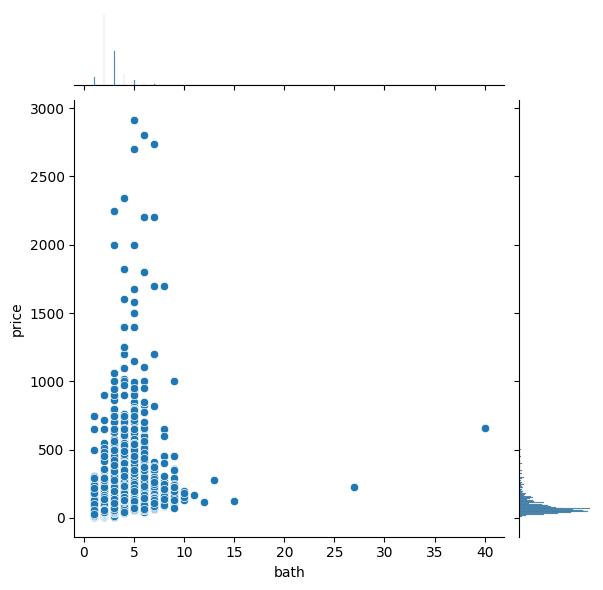

In [14]:
sns.jointplot(data,x='bath',y='price')

In [15]:
y=data['price']
x=data.drop(['price'],axis=1)

In [16]:
y.value_counts()

price
75.00     294
65.00     286
55.00     262
60.00     261
45.00     227
         ... 
27.54       1
84.95       1
63.98       1
402.00      1
488.00      1
Name: count, Length: 1924, dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(9716, 7) (2430, 7) (9716,) (2430,)


In [19]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
out_t=model1.predict(x_train)
print('MSE',mean_squared_error(y_train,out_t))
print('RMSE',np.sqrt(mean_squared_error(y_train,out_t)))
print('MAE',mean_absolute_error(y_train,out_t))
print('MAPE',mean_absolute_percentage_error(y_train,out_t))

MSE 13960.747261462813
RMSE 118.15560613641155
MAE 51.72078533017952
MAPE 0.5537740324364439


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
out=model1.predict(x_test)
print('MSE',mean_squared_error(y_test,out))
print('RMSE',np.sqrt(mean_squared_error(y_test,out)))
print('MAE',mean_absolute_error(y_test,out))
print('MAPE',mean_absolute_percentage_error(y_test,out))

MSE 12551.8135666337
RMSE 112.03487656365628
MAE 49.441053726848985
MAPE 0.5264889497579408


In [22]:
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 2)  
x_poly_train= poly_regs.fit_transform(x_train)  
x_poly_test= poly_regs.fit_transform(x_test)  
model2 =LinearRegression()  
model2.fit(x_poly_train, y_train)  

LinearRegression()

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
out_t=model2.predict(x_poly_train)
print('MSE',mean_squared_error(y_train,out_t))
print('RMSE',np.sqrt(mean_squared_error(y_train,out_t)))
print('MAE',mean_absolute_error(y_train,out_t))
print('MAPE',mean_absolute_percentage_error(y_train,out_t))

MSE 12526.765748212649
RMSE 111.92303493120909
MAE 48.60681045783235
MAPE 0.4940420486828069


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
out=model2.predict(x_poly_test)
print('MSE',mean_squared_error(y_test,out))
print('RMSE',np.sqrt(mean_squared_error(y_test,out)))
print('MAE',mean_absolute_error(y_test,out))
print('MAPE',mean_absolute_percentage_error(y_test,out))

MSE 11978.269786884952
RMSE 109.44528215909972
MAE 48.18732014075632
MAPE 0.4812560791243896


In [25]:
from sklearn.svm import SVR
model3=SVR()
model3.fit(x_train,y_train)

SVR()

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
out_t=model3.predict(x_train)
print('MSE',mean_squared_error(y_train,out_t))
print('RMSE',np.sqrt(mean_squared_error(y_train,out_t)))
print('MAE',mean_absolute_error(y_train,out_t))
print('MAPE',mean_absolute_percentage_error(y_train,out_t))

MSE 14526.407155728024
RMSE 120.52554565621358
MAE 42.320065758544956
MAPE 0.32112234046262117


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
out=model3.predict(x_test)
print('MSE',mean_squared_error(y_test,out))
print('RMSE',np.sqrt(mean_squared_error(y_test,out)))
print('MAE',mean_absolute_error(y_test,out))
print('MAPE',mean_absolute_percentage_error(y_test,out))

MSE 13173.069507235812
RMSE 114.77399316585536
MAE 41.69818949636975
MAPE 0.31797960425364474


In [28]:
from sklearn.tree import DecisionTreeRegressor
model4=DecisionTreeRegressor()
model4.fit(x_train,y_train)

DecisionTreeRegressor()

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
out_t=model4.predict(x_train)
print('MSE',mean_squared_error(y_train,out_t))
print('RMSE',np.sqrt(mean_squared_error(y_train,out_t)))
print('MAE',mean_absolute_error(y_train,out_t))
print('MAPE',mean_absolute_percentage_error(y_train,out_t))

MSE 25.168965668298362
RMSE 5.016868113504517
MAE 0.7181673171233386
MAPE 0.00809995560738599


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
out=model4.predict(x_test)
print('MSE',mean_squared_error(y_test,out))
print('RMSE',np.sqrt(mean_squared_error(y_test,out)))
print('MAE',mean_absolute_error(y_test,out))
print('MAPE',mean_absolute_percentage_error(y_test,out))

MSE 16339.272753559175
RMSE 127.82516478987687
MAE 44.07542385806923
MAPE 0.37585733332525406


In [1]:
!pip install AutoLogging-ML==1.2.4

In [31]:
from AutoLogging_ML import AutoLogger
a,model1=AutoLogger.train_and_log_regression(x_train, x_test, y_train, y_test)

Learning rate set to 0.058641
0:	learn: 132.1362070	total: 56.1ms	remaining: 56s
1:	learn: 129.5339558	total: 58.3ms	remaining: 29.1s
2:	learn: 127.4890516	total: 60.5ms	remaining: 20.1s
3:	learn: 125.1384905	total: 62.5ms	remaining: 15.6s
4:	learn: 123.0888628	total: 64.5ms	remaining: 12.8s
5:	learn: 121.4239982	total: 66.5ms	remaining: 11s
6:	learn: 119.5728662	total: 68.5ms	remaining: 9.72s
7:	learn: 117.9449509	total: 70.6ms	remaining: 8.76s
8:	learn: 116.6621253	total: 72.7ms	remaining: 8s
9:	learn: 115.3325406	total: 74.3ms	remaining: 7.36s
10:	learn: 113.9208886	total: 76ms	remaining: 6.83s
11:	learn: 112.5129273	total: 77.6ms	remaining: 6.39s
12:	learn: 111.5940821	total: 79.4ms	remaining: 6.03s
13:	learn: 110.6224090	total: 81.2ms	remaining: 5.71s
14:	learn: 109.5883688	total: 82.9ms	remaining: 5.44s
15:	learn: 108.9226738	total: 85ms	remaining: 5.23s
16:	learn: 108.0774769	total: 87ms	remaining: 5.03s
17:	learn: 107.5069439	total: 89.1ms	remaining: 4.86s
18:	learn: 106.665649

In [32]:
a

,model,training-mae,training-mse,training-mape,training-r2,training-median absolute error,training-maximum error,validation-mae,validation-mse,validation-mape,validation-r2,validation-median absolute error,validation-maximum error
0,linear regression,51.720785,13960.747261,0.553774,0.235114,24.361616,2393.337688,49.441054,12551.813567,0.526489,0.262982,24.361616,2393.337688
1,sgd regression,51.093538,13980.974273,0.542401,0.234006,23.641855,2396.590521,48.873911,12522.563881,0.516142,0.264700,23.641855,2396.590521
2,ridge regression,51.720563,13960.747290,0.553776,0.235114,24.366523,2393.357955,49.440912,12551.775864,0.526492,0.262984,24.366523,2393.357955
3,elastic net,52.110972,14227.415152,0.581609,0.220503,27.876857,2456.219471,50.122821,12818.842074,0.557173,0.247303,27.876857,2456.219471
4,decision tree regression,0.718167,25.168966,0.008100,0.998621,14.500000,2625.000000,45.400574,20814.486772,0.399214,-0.222186,14.500000,2625.000000
5,random forest regression,13.282174,1413.075630,0.121291,0.922580,12.801767,1574.420000,35.046128,8588.294421,0.312278,0.495712,12.801767,1574.420000
6,adaboost regression,56.332686,14293.986011,0.593804,0.216856,23.717692,1787.666667,54.592257,14215.385497,0.574496,0.165300,23.717692,1787.666667
7,gradient boost regression,36.498660,7158.524794,0.371423,0.607796,17.122469,1793.217522,38.403482,8877.379622,0.376702,0.478738,17.122469,1793.217522
8,xgboost regression,18.106078,939.195102,0.205498,0.948543,13.347095,1478.032471,34.649148,9265.990545,0.325749,0.455919,13.347095,1478.032471
9,bagging regression,14.902148,1878.256044,0.134142,0.897093,13.098000,1671.000000,36.250710,9101.730664,0.317896,0.465564,13.098000,1671.000000


<Axes: xlabel='validation-mae', ylabel='model'>

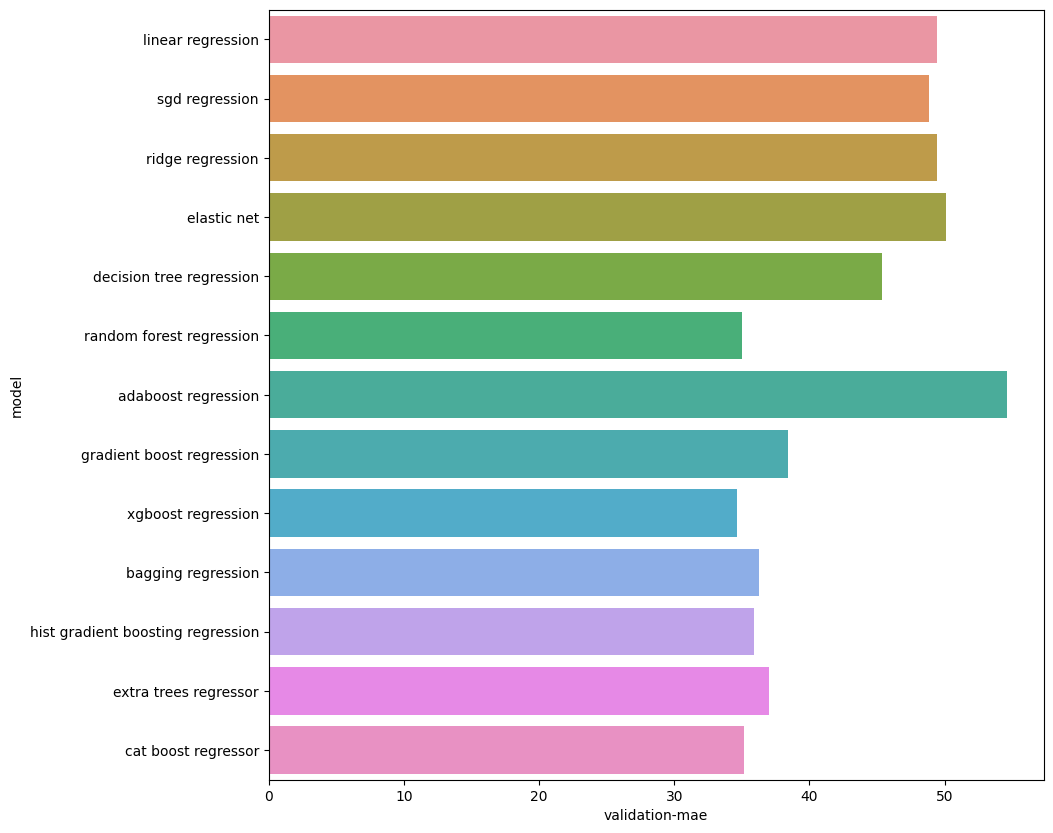

In [33]:
AutoLogger.get_metric_plots_regression(a,'validation','mae')

<Axes: xlabel='validation-mse', ylabel='model'>

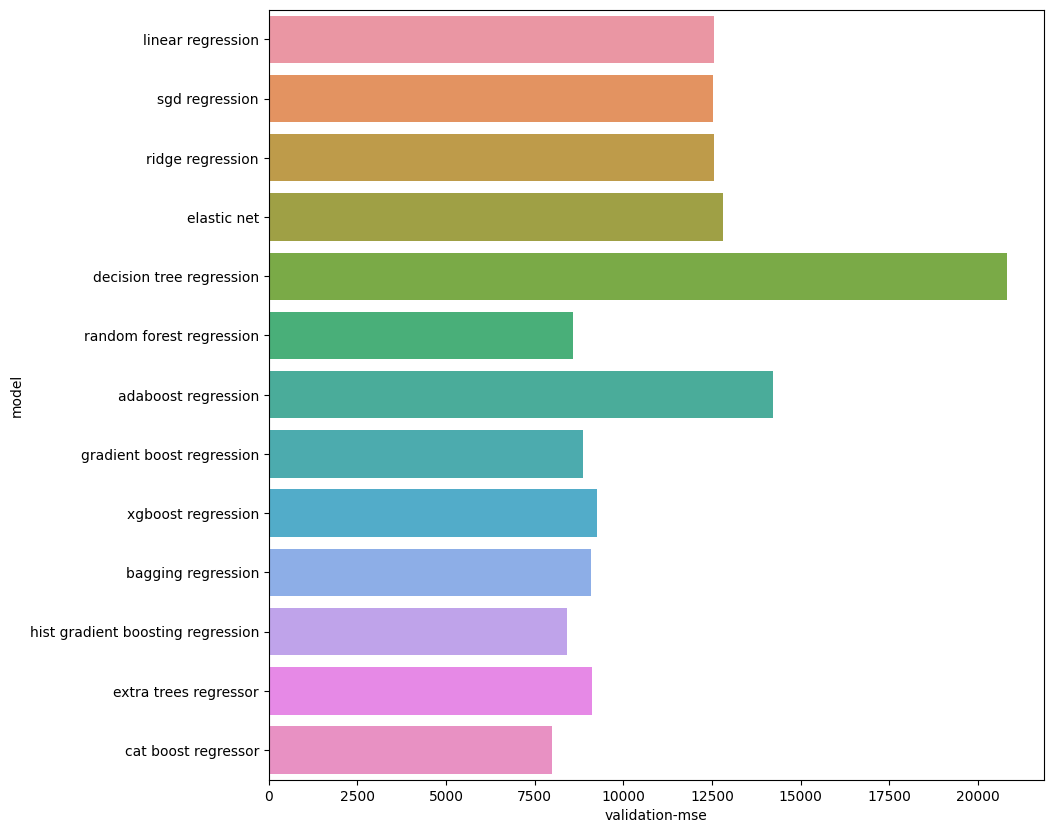

In [34]:
AutoLogger.get_metric_plots_regression(a,'validation','mse')

<Axes: xlabel='validation-mape', ylabel='model'>

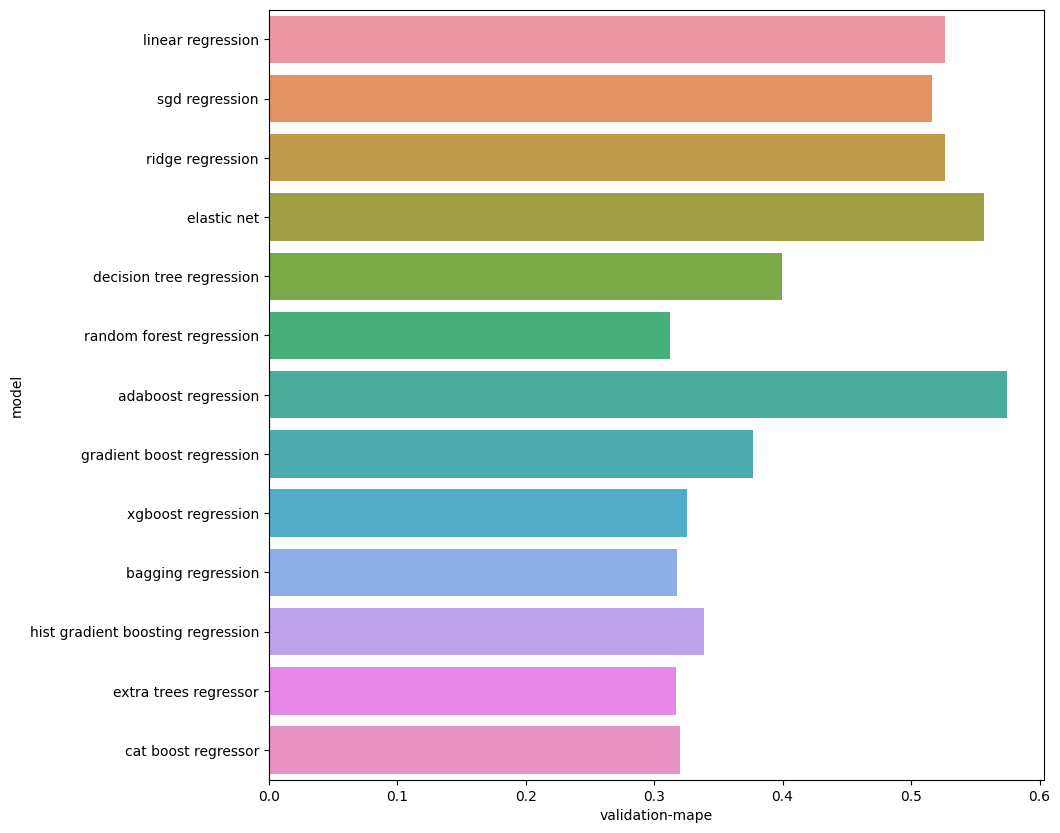

In [35]:
AutoLogger.get_metric_plots_regression(a,'validation','mape')

<Axes: xlabel='validation-r2', ylabel='model'>

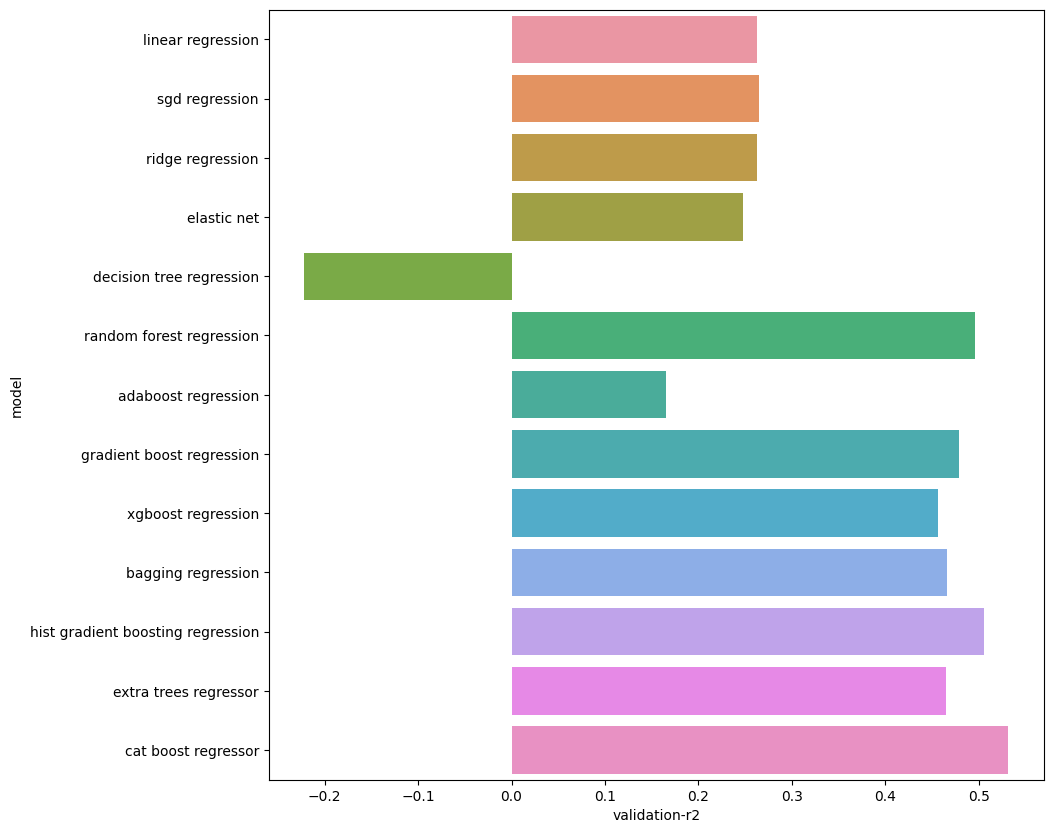

In [36]:
AutoLogger.get_metric_plots_regression(a,'validation','r2')

In [ ]:
area=str(input('enter area'))
avail=str(input('enter availability'))
location=str(input('enter location'))
size=int(input('enter size'))
sqft=int(input('enter square feet'))
baths=int(input('enter the number of bathrooms'))
bal=int(input('enter the number of balconies'))
l=LabelEncoder()
area=0
avail=0
location=0
ax=pd.DataFrame([[area,avail,location,size,sqft,baths,bal]],columns=['area','availability','location','size','total_sqft','bath','balcony'])
output=model4.predict(ax)
print(output)